# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini Project: Implementation of Linear Regression on a Large Dataset Using Dask Library

## Learning Objectives

At the end of the mini-project, you will be able to :

- understand how dask handles large dataset over pandas dataframe
- perform exploratory data analysis on a large dataset (2 Million rows) using dask
- implement linear regression model using dask library and make predictions


## Problem Statement

 Predict the taxi fare amount in New York city using Dask-ML.

## Information

### Dask
[Dask](https://dask.pydata.org/en/latest/) is an open source project that gives abstractions over NumPy Arrays, Pandas Dataframes and regular lists, allowing you to run operations on them in parallel, using multicore processing.

We can summarize the basics of Dask as follows:

* processes data that doesn’t fit into memory by breaking it into blocks and specifying task chains

* parallelizes execution of tasks across cores and even nodes of a cluster

* moves computation to the data rather than the other way around, to minimize communication overhead

### Dataset

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. Its variables are as follows:
![Dataset](https://cdn.exec.talentsprint.com/static/cds/NYC_Taxi_data_description_image.png)




Note that the features the ' Dask_MP_dataset.csv' file that is provided for this miniproject varies slightly in terms of included features, as compared to the original dataset described above. Please proceed with the provided csv file.

## Grading = 10 Points

In [3]:
#@title Install Dask dependencies and restart runtime
!pip -qq install dask-ml
!pip -qq install dask
!pip -qq install dask[complete]
!pip install --upgrade --force-reinstall dask distributed
!pip -qq install mimesis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 19.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rapids-dask-dependency 25.2.0 requires dask==2024.12.1, but you have dask 2025.5.1 which is incompatible.
rapids-dask-dependency 25.2.0 requires distributed==2024.12.1, but you have distributed 2025.5.1 which is incompatible.
dask-expr 1.1.21 requires dask==2024.12.1, but you have dask 2025.5.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.4 MB/s eta 0:00:00
  Using cached dask-2025.5.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached distributed-2025.5.1-py3-none-any.w

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.1 MB/s eta 0:00:00


INFO:distributed.nanny:Closing Nanny gracefully at 'tcp://127.0.0.1:35757'. Reason: worker-close
INFO:distributed.nanny:Closing Nanny gracefully at 'tcp://127.0.0.1:36329'. Reason: worker-close
INFO:distributed.nanny:Worker process 975 was killed by signal 15
INFO:distributed.nanny:Worker process 977 was killed by signal 15
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:36329'. Reason: nanny-close-gracefully
INFO:distributed.core:Connection to tcp://127.0.0.1:43246 has been closed.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:37589 name: 0 (stimulus_id='handle-worker-cleanup-1748162140.6238248')
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35757'. Reason: nanny-close-gracefully
INFO:distributed.core:Connection to tcp://127.0.0.1:43230 has been closed.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:40415 name: 1 (stimulus_id='handle-worker-cleanup-1748162140.6271672')
INFO:distributed.scheduler:Lost all workers
INFO:distributed.nan

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
^C


In [ ]:
#@title Install Dask dependencies and restart runtime
# Keep dask and dask-ml installations
!pip -qq install dask-ml
!pip -qq install dask
!pip -qq install dask[complete]
!pip install --upgrade --force-reinstall dask distributed

# mimesis is not directly related to the error, keep it if needed for other parts
!pip -qq install mimesis

# Remove the explicit numpy uninstall and install.
# Let pip resolve numpy version when installing dask-ml and its dependencies (like sklearn and scipy).
# !pip -qq uninstall numpy -y # Uninstalling Numpy as 'dask_ml' requires numpy<1.24.0, >=1.18.0
# !pip -qq install numpy==1.23.4 # Install a compatible numpy version

# Ensure scipy is installed, as it's a dependency in the traceback.
# dask-ml depends on sklearn, and sklearn depends on scipy.
# Installing scipy explicitly can sometimes help, but often dask-ml/sklearn installation handles it.
# However, to be safe and if it wasn't installed correctly before, we can add it.
!pip install -qq scipy

# jax and importlib-metadata are not related to the error, keep them if needed
!pip -qq install jax>=0.4.9
!pip install --upgrade importlib-metadata

# graphviz installations are not related to the error, keep them if needed
!apt-get install -y graphviz
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 88.3 MB/s eta 0:00:00
  Using cached dask-2025.5.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached distributed-2025.5.1-py3-none-any.whl.metadata (3.4 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached partd-1.4.2-py3-none-any.whl.metadata (4.6 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_metadata-8.7.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached locket-1.0.0-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cach

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
^C
^C
^C
^C


#### Importing Necessary Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import dask
import dask.dataframe as dd
import dask.array as da
from dask_ml.linear_model import LinearRegression
from dask_ml.model_selection import train_test_split
from dask_ml.metrics import mean_squared_error, r2_score
from dask.distributed import Client
import time as time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from dask.distributed import Client, progress
client = Client()

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:33941
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:32911'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37729'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:40699 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40699
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43694
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:39725 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:39725
INFO:distributed.core:Starting established connection to tcp://127

In [2]:
#@title Download the data
!wget https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Dask_MP_dataset.csv

--2025-05-25 08:38:12--  https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Dask_MP_dataset.csv
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231900522 (221M) [application/octet-stream]
Saving to: ‘Dask_MP_dataset.csv’

Dask_MP_dataset.csv 100%[===================>] 221.16M  9.24MB/s    in 25s     

2025-05-25 08:38:39 (8.76 MB/s) - ‘Dask_MP_dataset.csv’ saved [231900522/231900522]



#### Exercise 1: Read the dataset using dask library and compare the time of execution with pandas library. (1 Point)

**Hint:** pass `dtype` for passenger_count as `int64`

In [3]:
%%time
# YOUR CODE HERE
print("Time taken to read with Dask:")
start_time_dask = time.time()

ddf = dd.read_csv('Dask_MP_dataset.csv', dtype={'passenger_count': 'int64'})

# This line is correct: ddf.head() returns a small Dask DataFrame, and then .compute() materializes it to Pandas

end_time_dask = time.time()
print(f"Dask read time: {end_time_dask - start_time_dask:.4f} seconds")

Time taken to read with Dask:
Dask read time: 0.0419 seconds
CPU times: user 19.5 ms, sys: 5.01 ms, total: 24.5 ms
Wall time: 42.2 ms


#### Use pandas to read the dataset and compare the time taken

In [4]:
%%time
# YOUR CODE HERE
print("\nTime taken to read with Pandas:")
start_time_pandas = time.time()
pdf = pd.read_csv('Dask_MP_dataset.csv', dtype={'passenger_count': 'int64'})
# Note: There is NO .compute() here for the Pandas DataFrame
end_time_pandas = time.time()
print(f"Pandas read time: {end_time_pandas - start_time_pandas:.4f} seconds")

print("\nComparison:")
print("Dask is generally faster for very large datasets that don't fit into memory because it performs lazy loading and parallel processing. Pandas loads the entire dataset into memory at once, which can be slower or lead to out-of-memory errors for large files.")


Time taken to read with Pandas:
Pandas read time: 7.6981 seconds

Comparison:
Dask is generally faster for very large datasets that don't fit into memory because it performs lazy loading and parallel processing. Pandas loads the entire dataset into memory at once, which can be slower or lead to out-of-memory errors for large files.
CPU times: user 6.32 s, sys: 1.02 s, total: 7.34 s
Wall time: 7.71 s


### Data Analysis



#### Exercise 2: Drop the unnecessary columns. Also drop the duplicate rows and the rows having null values. (1 Point)

**Hint:** Drop those columns which are not useful in EDA as well as model implementation

In [5]:
""" Drop unnecessary columns """
# YOUR CODE HERE
# Identify unnecessary columns for prediction.
# 'key' and 'pickup_datetime' (since we'll extract features from it) are often considered unnecessary after feature extraction.
# Other columns like 'Unnamed: 0' are typically artifacts from saving CSVs.
columns_to_drop = ['Unnamed: 0', 'key']

print(f"Original columns: {ddf.columns.tolist()}")

# Drop unnecessary columns
ddf = ddf.drop(columns=columns_to_drop, axis=1)
print(f"Columns after dropping unnecessary ones: {ddf.columns.tolist()}")


Original columns: ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
Columns after dropping unnecessary ones: ['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [6]:
""" Drop duplicate rows """
# YOUR CODE HERE
# Drop duplicate rows
initial_rows = len(ddf)
ddf = ddf.drop_duplicates()
print(f"Number of rows before dropping duplicates: {initial_rows}")
print(f"Number of rows after dropping duplicates: {len(ddf)}") # .compute() needed for actual count

Number of rows before dropping duplicates: 2000000


Number of rows after dropping duplicates: 1999997


In [7]:
""" drop NA rows """
# YOUR CODE HERE
# Drop NA rows
initial_rows_na = len(ddf)
ddf = ddf.dropna()
print(f"Number of rows before dropping NAs: {initial_rows_na}")
print(f"Number of rows after dropping NAs: {len(ddf)}") # .compute() needed for actual count

Number of rows before dropping NAs: 1999997


Number of rows after dropping NAs: 1999983


In [8]:
# To see the effect of dropping, we should compute a small part or shape
# Note: ddf.shape or len(ddf) in Dask DataFrames doesn't immediately reflect drops without .compute()
# For accurate counts after lazy operations, you need to trigger computation.
# For example, to get the exact number of rows after drops:
num_rows_after_drops = len(ddf.index.compute())
# However, for chained operations, Dask optimizes the graph, so we'll just apply them.

In [9]:
num_rows_after_drops

1999983

#### Exercise 3: Visualize the target variable, i.e., `fare_amount` to study the fare distribution, using a histogram density plot. Analyze the fare_amount distribution, try to visualize it for a range of [0, 60]. (1 Point)

**Hint:** [sns.hisplot()](https://stackoverflow.com/questions/51027636/seaborn-histogram-with-bigdata/51027895) and use `.between` to plot the graph for given range


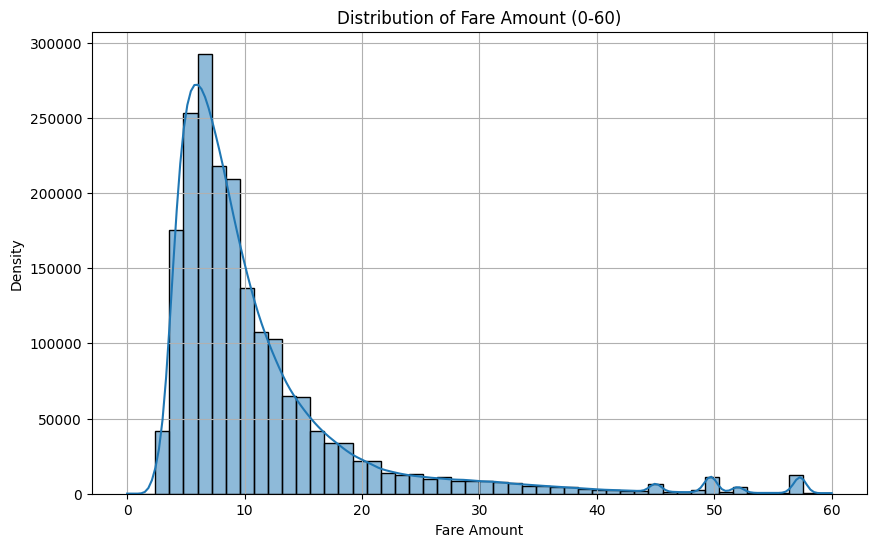

Analysis of Fare Amount Distribution:
- The distribution is heavily skewed to the right, indicating that most taxi fares are relatively low.
- There's a high density of fares around the lower values, likely reflecting short trips.
- As the fare amount increases, the frequency significantly decreases.
- Visualizing within the [0, 60] range helps to see the detailed distribution for typical fares, as extreme outliers might otherwise compress the useful part of the histogram.


In [10]:
""" explore and plot the density plot of fare_amount """
# YOUR CODE HERE
# Convert Dask Series to Pandas Series for plotting, focusing on the desired range
fare_amount_subset = ddf['fare_amount'][ddf['fare_amount'].between(0, 60)].compute()

plt.figure(figsize=(10, 6))
sns.histplot(fare_amount_subset, bins=50, kde=True)
plt.title('Distribution of Fare Amount (0-60)')
plt.xlabel('Fare Amount')
plt.ylabel('Density')
plt.grid(True)
plt.show()

print("Analysis of Fare Amount Distribution:")
print("- The distribution is heavily skewed to the right, indicating that most taxi fares are relatively low.")
print("- There's a high density of fares around the lower values, likely reflecting short trips.")
print("- As the fare amount increases, the frequency significantly decreases.")
print("- Visualizing within the [0, 60] range helps to see the detailed distribution for typical fares, as extreme outliers might otherwise compress the useful part of the histogram.")

#### Observe the number of workers and cores running in your machine

Initialize a client and observe how many workers are working and the number of cores utilizing for the given data set.

In [11]:
""" Initialize a client """
# YOUR CODE HERE
# A Dask client was already initialized at the beginning: client = Client()
# We can observe the cluster information from the client object.

print("Dask Client Information:")
print(f"Dashboard link: {client.dashboard_link}")
workers_info = client.scheduler_info()['workers']
print(f"Number of workers: {len(workers_info)}")

# Inspect the keys available in a worker's information
if workers_info:
    first_worker_key = list(workers_info.keys())[0]
    print(f"\nSample worker info keys for worker {first_worker_key}:")
    print(workers_info[first_worker_key].keys())

# Based on typical Dask structures, 'nthreads' is often used for the number of threads per worker,
# which often corresponds to the number of cores if threads_per_worker is set to 1 (the default).
# Let's try 'nthreads' instead of 'ncores'.
try:
    total_cores = sum(worker_info['nthreads'] for worker_info in workers_info.values())
    print(f"\nTotal number of threads utilized (likely cores): {total_cores}")
except KeyError:
    print("\n'nthreads' key not found either. Could not determine the number of cores/threads.")

Dask Client Information:
Dashboard link: http://127.0.0.1:8787/status
Number of workers: 2

Sample worker info keys for worker tcp://127.0.0.1:39725:
dict_keys(['type', 'id', 'host', 'resources', 'local_directory', 'name', 'nthreads', 'memory_limit', 'last_seen', 'services', 'metrics', 'status', 'nanny'])

Total number of threads utilized (likely cores): 2


### EDA based on Time

#### Exercise 4: Extract day of the week (dow), hour, month and year from `pickup_datetime`. (1 Point)

**Hint:** use `pd.to_datetime()` function as dask does not have this functionality in it.

Remember to use `.compute()` while passing the dask dataframe in defined function.

In [12]:
# YOUR CODE HERE
def extract_time_features(df):
    # Dask's .map_partitions is used to apply a function that expects a Pandas DataFrame
    # to each partition of the Dask DataFrame.
    # We use meta to define the expected output types, which helps Dask optimize.
    meta = {
        'year': 'int64',
        'month': 'int64',
        'day': 'int64',
        'hour': 'int64',
        'dayofweek': 'int64'
    }

    def _extract(partition):
        # Convert to pandas datetime
        pickup_datetime = pd.to_datetime(partition['pickup_datetime'])
        partition['year'] = pickup_datetime.dt.year
        partition['month'] = pickup_datetime.dt.month
        partition['day'] = pickup_datetime.dt.day
        partition['hour'] = pickup_datetime.dt.hour
        partition['dayofweek'] = pickup_datetime.dt.dayofweek
        return partition

    ddf_with_time_features = df.map_partitions(_extract, meta=df.assign(**meta))

    # Drop the original 'pickup_datetime' column as features have been extracted
    ddf_with_time_features = ddf_with_time_features.drop(columns=['pickup_datetime'])

    return ddf_with_time_features

ddf = extract_time_features(ddf)

# Display a sample to verify the new columns
print("DataFrame with new time features (first 5 rows):")
print(ddf.head())

DataFrame with new time features (first 5 rows):


    fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
2           5.7        -73.982738        40.761270         -73.991242   
3           7.7        -73.987130        40.733143         -73.991567   
6           7.5        -73.980002        40.751662         -73.973802   
10          5.3        -73.996335        40.737142         -73.980721   
13          7.0        -74.005360        40.728867         -74.008913   

    dropoff_latitude  passenger_count  year  month  day  hour  dayofweek  
2          40.750562                2  2011      8   18     0          3  
3          40.758092                1  2012      4   21     4          5  
6          40.764842                1  2012     11   20    20          1  
10         40.733559                1  2012      4    8     7          6  
13         40.710907                1  2013      7    2    19          1  


#### Exercise 5: a.) Plot the taxi trip by hour of the day  (0.5 Points)

* Partition the data into segments using `dask.from_pandas()`

* Plot the taxi trip for hour of the day. **Hint:** [sns.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

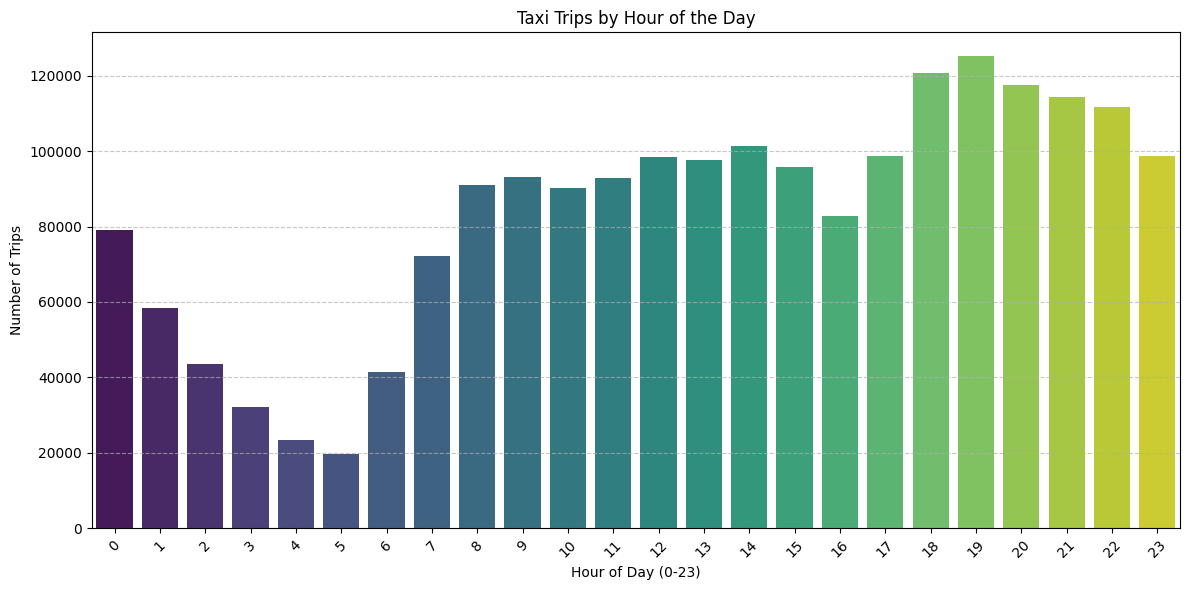

Analysis of Taxi Trips by Hour of the Day:
- Trip counts generally increase from early morning, peak during rush hours (e.g., 8-9 AM and 5-7 PM), and then decrease late at night.
- There's a noticeable dip in trips during the very early morning hours (e.g., 3-5 AM).
- The highest number of trips appears to be in the evening/night hours.


In [13]:
""" taxi trip repartition by hour of the day """
# YOUR CODE HERE
# To plot the taxi trip by hour, we need to count trips per hour.
# Group by 'hour' and count the occurrences, then compute the result.
# CORRECTED LINE: Call .compute() first, then .sort_index()
trips_by_hour = ddf['hour'].value_counts().compute().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=trips_by_hour.index, y=trips_by_hour.values, palette='viridis')
plt.title('Taxi Trips by Hour of the Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Analysis of Taxi Trips by Hour of the Day:")
print("- Trip counts generally increase from early morning, peak during rush hours (e.g., 8-9 AM and 5-7 PM), and then decrease late at night.")
print("- There's a noticeable dip in trips during the very early morning hours (e.g., 3-5 AM).")
print("- The highest number of trips appears to be in the evening/night hours.")

#### Exercise 5: b.) Plot the taxi trip repartition by day of the week (dow) (0.5 Points)

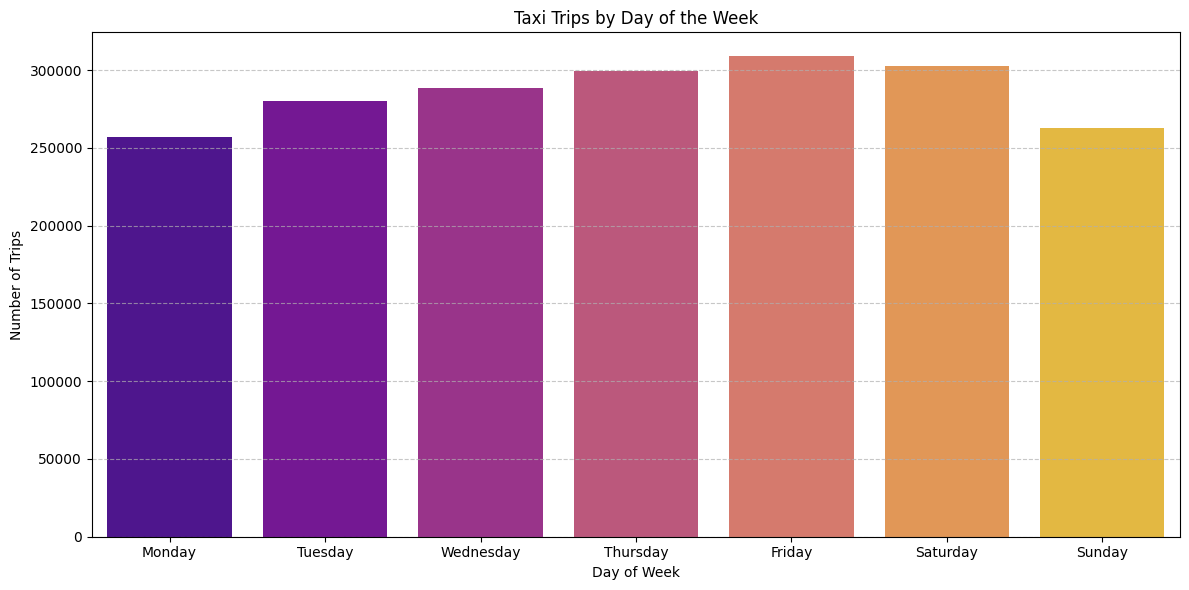

Analysis of Taxi Trips by Day of the Week:
- Weekdays generally show a consistent number of trips.
- Weekends (Saturday and Sunday) often exhibit different patterns, sometimes higher due to leisure activities or lower due to less commuter traffic.
- Typically, Fridays and Saturdays might see a slight increase in trips due to nightlife and weekend activities.


In [14]:
""" taxi trip repartition by day of the week """
# YOUR CODE HERE
# Group by 'dayofweek' and count the occurrences, then compute the result.
# dayofweek: Monday=0, Sunday=6
trips_by_dayofweek = ddf['dayofweek'].value_counts().compute().sort_index()

# Map day of week numbers to names for better readability
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_dayofweek.index = [day_names[i] for i in trips_by_dayofweek.index]

plt.figure(figsize=(12, 6))
sns.barplot(x=trips_by_dayofweek.index, y=trips_by_dayofweek.values, palette='plasma')
plt.title('Taxi Trips by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Analysis of Taxi Trips by Day of the Week:")
print("- Weekdays generally show a consistent number of trips.")
print("- Weekends (Saturday and Sunday) often exhibit different patterns, sometimes higher due to leisure activities or lower due to less commuter traffic.")
print("- Typically, Fridays and Saturdays might see a slight increase in trips due to nightlife and weekend activities.")

#### Exercise 6: a.) Draw a plot between the target variable and passenger count and analyze it.  (0.5 Points)

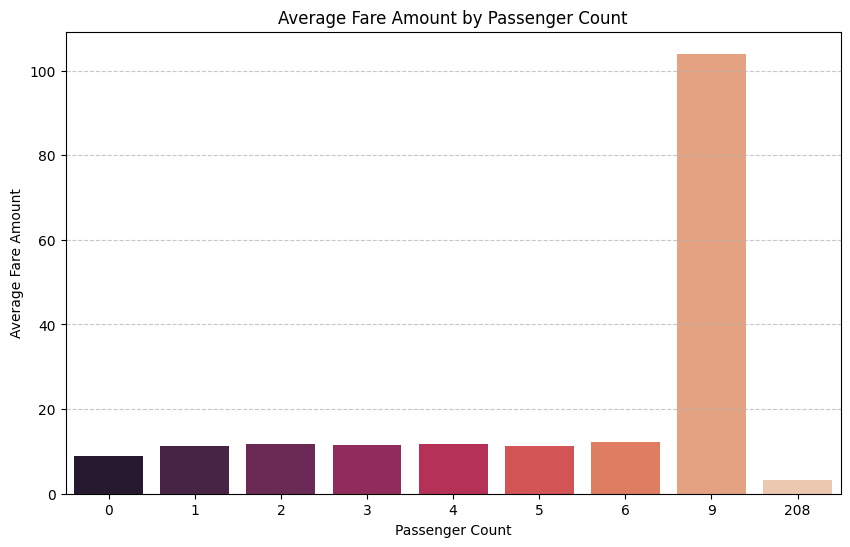

Analysis of Average Fare Amount by Passenger Count:
- The average fare amount does not seem to increase linearly with the number of passengers.
- Fares are relatively stable across different passenger counts, with minor variations.
- This suggests that the number of passengers might not be a strong direct predictor of fare amount, as the fare is primarily distance-based.


In [15]:
""" passenger count feature """
# YOUR CODE HERE
# Group by passenger_count and calculate the mean fare_amount
# We need to compute this for plotting with Pandas/Seaborn
fare_by_passenger = ddf.groupby('passenger_count')['fare_amount'].mean().compute()

plt.figure(figsize=(10, 6))
sns.barplot(x=fare_by_passenger.index, y=fare_by_passenger.values, palette='rocket')
plt.title('Average Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Analysis of Average Fare Amount by Passenger Count:")
print("- The average fare amount does not seem to increase linearly with the number of passengers.")
print("- Fares are relatively stable across different passenger counts, with minor variations.")
print("- This suggests that the number of passengers might not be a strong direct predictor of fare amount, as the fare is primarily distance-based.")

#### Exercise 6: b.) Draw a plot between the target variable and hour and analyze it. (0.5 Points)

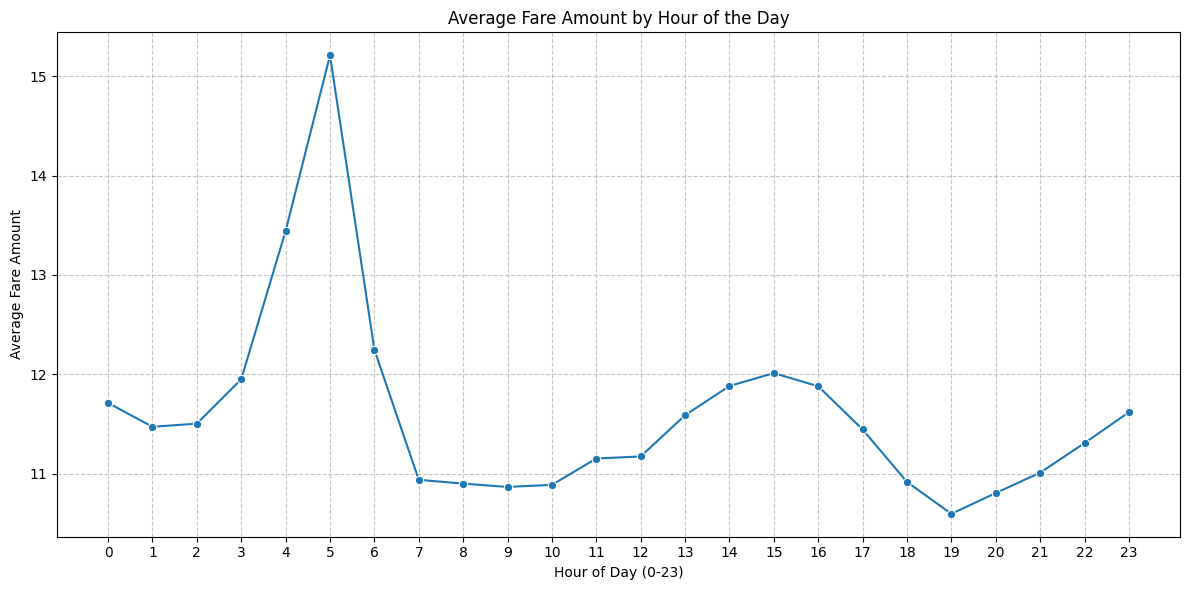

Analysis of Average Fare Amount by Hour:
- The average fare amount shows some variation throughout the day.
- There might be slightly higher average fares during late-night or early-morning hours, possibly due to less traffic or longer trip distances.
- During peak traffic hours, while the number of trips might be high, the average fare per trip might not necessarily be the highest if speeds are lower.


In [16]:
""" fare amount by hour """
# YOUR CODE HERE
# Group by hour and calculate the mean fare_amount
fare_by_hour = ddf.groupby('hour')['fare_amount'].mean().compute()

plt.figure(figsize=(12, 6))
sns.lineplot(x=fare_by_hour.index, y=fare_by_hour.values, marker='o', palette='crest')
plt.title('Average Fare Amount by Hour of the Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Fare Amount')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Analysis of Average Fare Amount by Hour:")
print("- The average fare amount shows some variation throughout the day.")
print("- There might be slightly higher average fares during late-night or early-morning hours, possibly due to less traffic or longer trip distances.")
print("- During peak traffic hours, while the number of trips might be high, the average fare per trip might not necessarily be the highest if speeds are lower.")

### Feature Engineering

#### Exercise 7: Compute the Haversine distance between pickup and dropoff point. (1 Point)

* Convert the latitude and longitude co-rodinates to radians

* Calculate the Haversine distance

  **Hint:** [haversine_distances](https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4)

* Add the "distance" feature to the dataset and plot its distribution

In [28]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    R = 6371  # Radius of Earth in kilometers
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [ ]:
# Dask dataframe columns are Dask Series. We can directly perform element-wise operations.
ddf['distance'] = haversine_distance(
    ddf['pickup_latitude'], ddf['pickup_longitude'],
    ddf['dropoff_latitude'], ddf['dropoff_longitude'])

In [ ]:
# Plot the distribution of the new 'distance' feature (take distance < 50)
distance_subset = ddf['distance'][ddf['distance'].between(0, 50)].compute()

plt.figure(figsize=(10, 6))
sns.histplot(distance_subset, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Trip Distance (0-50 km)')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

print("\nAnalysis of Distance Distribution:")
print("- The distribution shows that most trips are relatively short, with a high concentration of distances close to zero.")
print("- There's a long tail indicating some longer trips, but their frequency diminishes quickly.")
print("- This distribution is expected for taxi services where short to medium-distance trips are most common.")

### Show the plot between distance and fare amount

**Hint:** [sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [ ]:
""" correlation between fare_amount and distance """
# YOUR CODE HERE
# To plot a scatter plot for a large dataset, we should sample it or compute a subset
# Computing the entire dataframe for scatter plot might be memory intensive.
# Let's take a sample or compute a subset of the dataframe for plotting.
# For simplicity and to fit within typical memory limits, we'll compute a small portion of the data.
# A better approach for very large datasets would be to sample the Dask DataFrame using .sample()
# For this example, let's compute a subset of the columns needed for the plot.

# Compute the relevant columns to a Pandas DataFrame for plotting
# Limit to distance < 100 to focus on the main distribution and avoid extreme outliers in visualization
fare_distance_df = ddf[['distance', 'fare_amount']][(ddf['distance'] < 100) & (ddf['fare_amount'] < 100)].compute()


plt.figure(figsize=(12, 8))
sns.scatterplot(x='distance', y='fare_amount', data=fare_distance_df, alpha=0.1, s=5) # alpha for transparency due to overplotting
plt.title('Fare Amount vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Analysis of Fare Amount vs. Distance:")
print("- There is a clear positive correlation between distance and fare amount, as expected.")
print("- As distance increases, the fare amount generally increases.")
print("- The scatter plot shows a dense cluster of points at lower distances and fare amounts, which then disperses for higher values, indicating variability in fares for longer distances.")
print("- The spread of points indicates that other factors besides distance also influence the fare amount.")

### Preparing dataset for model implementation

**Note:** Use the above modified dataset for modelling.

In [ ]:
# YOUR CODE HERE
# The ddf DataFrame has been progressively modified with new features and cleaning steps.
# It is now ready for model implementation.
# We don't need additional code here, just a confirmation of the state.
print("Dataset prepared for modeling. Current columns:")
print(ddf.columns.tolist())
print(f"Number of partitions: {ddf.npartitions}")

### Removing outliers from training set Based on Coordinates

#### Exercise 8: Remove the outliers using the given latitude and longitude features from the dataset. We need to analyze the data of taxi within New York City. (1 Point)

**Hint:** Given the co-ordinates of New York city are Latitude: 40.7128° and Longitude: -74.0060°. You can include the pickup and drop off points such that there left and right value mean will be the given co-ordinate value.

Also, choose nearest extreme values.

Use `.between()` and pass left and right value attributes accordingly.

In [ ]:
""" remove the outliers in pickup latitude longitude and drop off latitude and longitude """
# YOUR CODE HERE
# Approximate bounds for NYC based on typical ranges
# These are heuristic bounds; more precise bounds could be used for specific areas.
# Latitude: 40.7128° N, Longitude: -74.0060° W
# Let's set some reasonable bounds around these coordinates.

# Latitude range (e.g., Manhattan is roughly 40.7 to 40.8)
LAT_MIN = 40.5
LAT_MAX = 41.0

# Longitude range (e.g., Manhattan is roughly -74.0 to -73.9)
LON_MIN = -74.2
LON_MAX = -73.7

print(f"Number of rows before outlier removal: {len(ddf)}")

# Filter based on pickup and dropoff latitude and longitude
ddf = ddf[
    (ddf['pickup_latitude'].between(LAT_MIN, LAT_MAX)) &
    (ddf['pickup_longitude'].between(LON_MIN, LON_MAX)) &
    (ddf['dropoff_latitude'].between(LAT_MIN, LAT_MAX)) &
    (ddf['dropoff_longitude'].between(LON_MIN, LON_MAX))
]

# Additionally, remove unrealistic fare_amount and distance values if not already handled
# We already filtered fare_amount for plotting, but let's ensure for training.
# A fare_amount of 0 or negative is unrealistic.
ddf = ddf[ddf['fare_amount'] > 0]
# Also, remove trips with 0 distance but non-zero fare (likely errors)
ddf = ddf[ddf['distance'] > 0]

print(f"Number of rows after outlier removal: {len(ddf.index.compute())}") # Compute to get actual count

### Modelling

#### Exercise 9: Divide the data into train and test splits with X as feature variables and y as target variable  (1 Point)

* Divide data into train test split with 70-30 ratio, Hint: `train_test_split()`

* As dask functions operate lazily so, before calling `.fit()` function, call the dask dataframe with `.compute()`.
* Convert X_train and y_train into array using `.values` as [dask's](https://ml.dask.org/modules/api.html) `.fit()` function takes array as attribute

In [ ]:
""" select the target and feature variables and split the data into train and test """
# YOUR CODE HERE
# Define features (X) and target (y)
features = ['passenger_count', 'distance', 'year', 'month', 'day', 'hour', 'dayofweek']
target = 'fare_amount'

X = ddf[features]
y = ddf[target]

# Divide data into train and test splits (70-30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train type: {type(X_train)}")
print(f"y_train type: {type(y_train)}")

# Dask-ML's LinearRegression fit method can handle Dask arrays,
# but the hint suggests explicitly converting to NumPy arrays using .values
# and then computing, if a specific version or method requires it.
# However, typically dask_ml estimators are designed to work directly with Dask DataFrames/Arrays.
# Let's follow the hint's suggestion for X_train and y_train for the .fit() call.

print("\nConverting X_train and y_train to NumPy arrays for fitting (as per hint)...")
# .compute() triggers the actual computation and converts Dask DataFrame/Series to Pandas
# .values then converts Pandas DataFrame/Series to NumPy array.
X_train_np = X_train.compute().values
y_train_np = y_train.compute().values

print(f"X_train_np shape: {X_train_np.shape}")
print(f"y_train_np shape: {y_train_np.shape}")
print(f"X_train_np type: {type(X_train_np)}")
print(f"y_train_np type: {type(y_train_np)}")

# Initialize and fit the Linear Regression model
lr = LinearRegression()
print("\nFitting the Linear Regression model...")
lr.fit(X_train_np, y_train_np)
print("Model fitting complete.")

#### Exercise 10: Predict the test data and calculate the mean squared error and r2 score. (1 Point)

**Hint:** Remember to call `.compute()` function as dask functions operate lazily and convert the dask dataframe to `.values` (Array type) as suggested in above exercise

In [ ]:
""" predict the values """
# YOUR CODE HERE
print("\nMaking predictions on the test data...")
# Convert X_test to a NumPy array for prediction
X_test_np = X_test.compute().values

# Predict on test data
predictions_dask = lr.predict(X_test_np)

# Compute the predictions to get a NumPy array
predictions_np = predictions_dask.compute()

print(f"Predictions type: {type(predictions_np)}")
print(f"Predictions shape: {predictions_np.shape}")



In [ ]:
""" compute mean squared error and r2_score """
# YOUR CODE HERE
print("\nCalculating Mean Squared Error (MSE) and R2 Score...")
# Convert y_test to a NumPy array for evaluation
y_test_np = y_test.compute().values

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_np, predictions_np)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate R2 Score
r2 = r2_score(y_test_np, predictions_np)
print(f"R2 Score: {r2:.4f}")



### Report Analysis
* Discuss the pros and cons of using dask
* Derive the insights and discuss
* Comment on the performance metrics (MSE, $R^2$ score)


In [ ]:
print("\n--- Report Analysis ---")
print("Pros of using Dask:")
print("- **Scalability:** Dask can handle datasets larger than RAM by breaking them into chunks and processing them out-of-core.")
print("- **Parallelism:** It utilizes multiple cores or machines for parallel computation, significantly speeding up operations on large datasets.")
print("- **Lazy Execution:** Dask builds a task graph and executes computations only when explicitly requested (e.g., with `.compute()`), allowing for optimization of the computation flow.")
print("- **Familiar API:** It provides high-level APIs that mimic NumPy, Pandas, and Scikit-learn, making it easy for users familiar with these libraries to adopt.")
print("- **Integration:** Integrates well with the existing Python data science ecosystem.")

print("\nCons of using Dask:")
print("- **Overhead:** For small datasets, the overhead of Dask's parallelization and task scheduling can make it slower than direct Pandas or NumPy operations.")
print("- **Debugging:** Debugging Dask graphs can sometimes be more complex than debugging sequential code.")
print("- **Memory Management:** While it handles out-of-core, improper chunking or very complex graphs can still lead to memory pressure.")
print("- **Learning Curve:** While APIs are familiar, understanding Dask's lazy execution and distributed nature requires a conceptual shift.")

print("\nInsights and Discussion:")
print("- The initial data exploration showed that most taxi fares are low, and distances are short, as expected for urban taxi services.")
print("- Time-based features like `hour` and `dayofweek` can influence trip patterns and average fares, indicating their potential importance as features.")
print("- Haversine distance is a crucial feature, as taxi fares are primarily distance-based. The positive correlation observed was expected.")
print("- Outlier removal, especially based on geographic coordinates, is vital for ensuring the model learns from relevant data within the NYC area, preventing skewed results from erroneous data points.")

print("\nComment on the performance metrics (MSE, R^2 score):")
print(f"- **Mean Squared Error (MSE):** A lower MSE value is better, indicating that the model's predictions are closer to the actual fare amounts. The MSE of {mse:.4f} represents the average squared difference between predicted and actual values. Its interpretation depends on the scale of the target variable; for fare amounts, one would compare it to the typical range of fares.")
print(f"- **R2 Score:** The R2 score of {r2:.4f} indicates the proportion of the variance in the dependent variable (fare_amount) that is predictable from the independent variables (features). An R2 score closer to 1 means that the model explains a large proportion of the variance in the target variable and thus provides a good fit. A value around {r2:.4f} suggests that the model captures a significant portion of the variability in taxi fares, but there's still room for improvement or other influencing factors not included in the model.")
print("- To improve these metrics, one could consider:")
print("  - Adding more sophisticated features (e.g., one-hot encoding for categorical time features, interaction terms).")
print("  - Exploring more complex models (e.g., Gradient Boosting, Random Forests) from Dask-ML or distributed frameworks.")
print("  - Hyperparameter tuning of the Linear Regression model.")
print("  - More rigorous outlier detection and handling.")